+ Emotion Detection in Text
+ Text Classifier

In [ ]:
#Load EDA Pkgs
import pandas as pd
import numpy as np


In [ ]:
#Load Data Viz Pkgs
import seaborn as sns


In [ ]:
import neattext.functions as nfx


In [ ]:

#load ML Pkgs
#Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Transformers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
#Load Dataset
df=pd.read_csv("data/emotion_dataset_2.csv")

In [ ]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
#Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

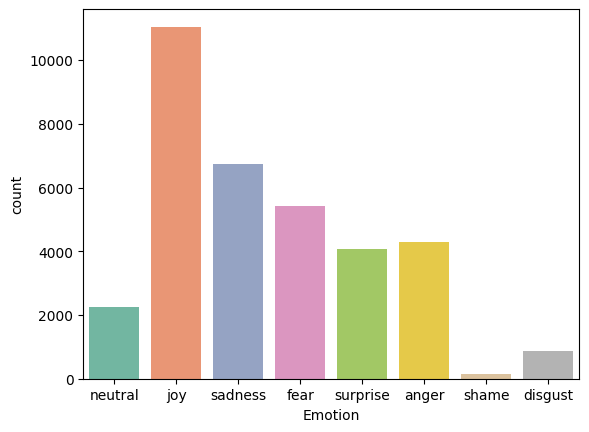

In [ ]:
#Plot
sns.countplot(x='Emotion', data=df, hue='Emotion', palette='Set2', legend=False)


In [ ]:
#Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
#Removes User Handles
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [ ]:
#Removes Stopwords
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
#Remove Special Characters
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_special_characters)

df

In [ ]:
#Features & Lablels
Xfeatures=df['Clean_Text']
ylabels=df['Emotion']

In [ ]:
#Split Data
x_train,x_test,y_train,y_test=train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:

# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\CUTY COMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('cv', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:

pipe_lr

,steps,"[('cv', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6217666219582295

In [ ]:

# Make A Prediction
ex1 = "this book was sad"

In [ ]:
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [ ]:

# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.00454052e-02, 8.89597846e-03, 4.86354218e-03, 2.28574989e-02,
        2.64206404e-03, 9.49310639e-01, 2.41589290e-04, 1.14328328e-03]])

In [ ]:

# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:

# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()
